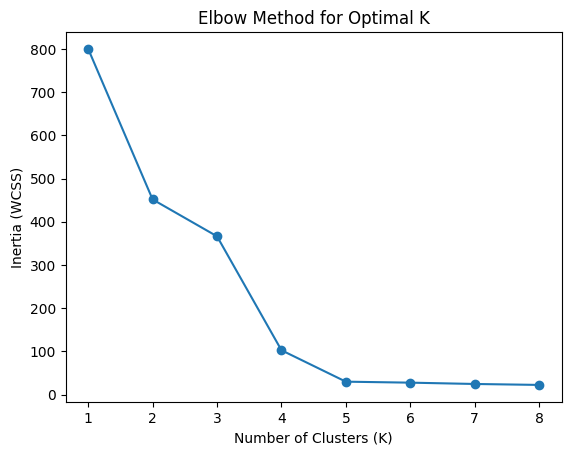

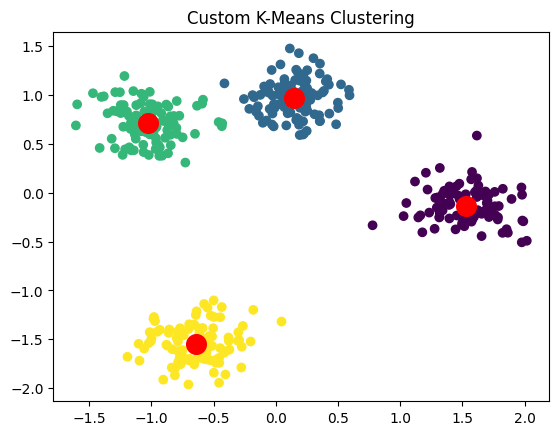

Custom K-Means Inertia: 32.676474392078454
Scikit-learn KMeans Inertia: 32.67647439207843
Adjusted Rand Index (ARI): 1.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


# Generate dataset
X, y_true = make_blobs(
    n_samples=400,
    centers=4,
    cluster_std=1.2,
    random_state=42
)

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


def initialize_centroids(X, K):
    indices = np.random.choice(len(X), K, replace=False)
    return X[indices]


def assign_clusters(X, centroids):
    clusters = []
    for x in X:
        distances = [euclidean_distance(x, c) for c in centroids]
        clusters.append(np.argmin(distances))
    return np.array(clusters)


def update_centroids(X, clusters, K):
    new_centroids = []
    for k in range(K):
        cluster_points = X[clusters == k]
        new_centroids.append(cluster_points.mean(axis=0))
    return np.array(new_centroids)


def calculate_inertia(X, clusters, centroids):
    inertia = 0
    for i, x in enumerate(X):
        inertia += euclidean_distance(x, centroids[clusters[i]]) ** 2
    return inertia


def calculate_inertia(X, clusters, centroids):
    inertia = 0
    for i, x in enumerate(X):
        inertia += euclidean_distance(x, centroids[clusters[i]]) ** 2
    return inertia


def kmeans_custom(X, K, max_iters=100):
    centroids = initialize_centroids(X, K)

    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    inertia = calculate_inertia(X, clusters, centroids)
    return clusters, centroids, inertia



inertia_values = []

K_range = range(1, 9)
for K in K_range:
    _, _, inertia = kmeans_custom(X, K)
    inertia_values.append(inertia)

# Plot Elbow Curve
plt.plot(K_range, inertia_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.show()

K_optimal = 4
custom_labels, custom_centroids, custom_inertia = kmeans_custom(X, K_optimal)



plt.scatter(X[:, 0], X[:, 1], c=custom_labels, cmap='viridis')
plt.scatter(custom_centroids[:, 0], custom_centroids[:, 1],
            c='red', marker='o', s=200)
plt.title("Custom K-Means Clustering")
plt.show()



sk_kmeans = KMeans(n_clusters=4, random_state=42)
sk_labels = sk_kmeans.fit_predict(X)

sk_inertia = sk_kmeans.inertia_


print("Custom K-Means Inertia:", custom_inertia)
print("Scikit-learn KMeans Inertia:", sk_inertia)


ari_score = adjusted_rand_score(custom_labels, sk_labels)
print("Adjusted Rand Index (ARI):", ari_score)

